In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [3]:
filenames=os.listdir("C:/Users/rachit/Documents/Projects/train/train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [7]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [8]:
train_datagen = ImageDataGenerator(rotation_range=15,rescale=1./255,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
train_generator = train_datagen.flow_from_dataframe(train_df,"C:/Users/rachit/Documents/Projects/train/train",x_col='filename',y_col='category',target_size=Image_Size,class_mode='categorical',batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validate_df, "C:/Users/rachit/Documents/Projects/train/train", x_col='filename',y_col='category',target_size=Image_Size,class_mode='categorical',batch_size=batch_size)
test_datagen = ImageDataGenerator(rotation_range=15,rescale=1./255,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
test_generator = train_datagen.flow_from_dataframe(train_df,"C:/Users/rachit/Documents/Projects/train/train",x_col='filename',y_col='category',target_size=Image_Size,class_mode='categorical',batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.


In [9]:
epochs=6
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/6
1333/1333 [==============================] - 951s 714ms/step - loss: 0.7449 - accuracy: 0.6334 - val_loss: 0.5603 - val_accuracy: 0.7033
Epoch 2/6
1333/1333 [==============================] - 850s 637ms/step - loss: 0.5691 - accuracy: 0.7088 - val_loss: 0.6274 - val_accuracy: 0.7133
Epoch 3/6
1333/1333 [==============================] - 851s 639ms/step - loss: 0.5094 - accuracy: 0.7565 - val_loss: 0.5416 - val_accuracy: 0.7672
Epoch 4/6
1333/1333 [==============================] - 855s 642ms/step - loss: 0.4658 - accuracy: 0.7850 - val_loss: 0.4119 - val_accuracy: 0.8102
Epoch 5/6
1333/1333 [==============================] - 904s 678ms/step - loss: 0.4392 - accuracy: 0.7972 - val_loss: 0.3872 - val_accuracy: 0.8212
Epoch 6/6
1333/1333 [==============================] - 905s 679ms/step - loss: 0.4236 - accuracy: 0.8109 - val_loss: 0.4639 - val_accuracy: 0.7810


In [10]:
model.save("model1_catsVSdogs.h5")

In [11]:
test_filenames = os.listdir("C:/Users/rachit/Documents/Projects/test1/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [12]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predict.head()

Instructions for updating:
Please use Model.predict, which supports generators.


In [33]:
print(predict)
predict.shape[0]

[[0.9785421  0.02145785]
 [0.959243   0.04075696]
 [0.91688424 0.08311573]
 ...
 [0.7945765  0.20542347]
 [0.3306827  0.66931725]
 [0.8562814  0.14371859]]


12510

In [34]:
test_df['category'] = np.argmax(predict)
test_df['category'].shape[0]
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 1:'dog', 0: 'cat'})

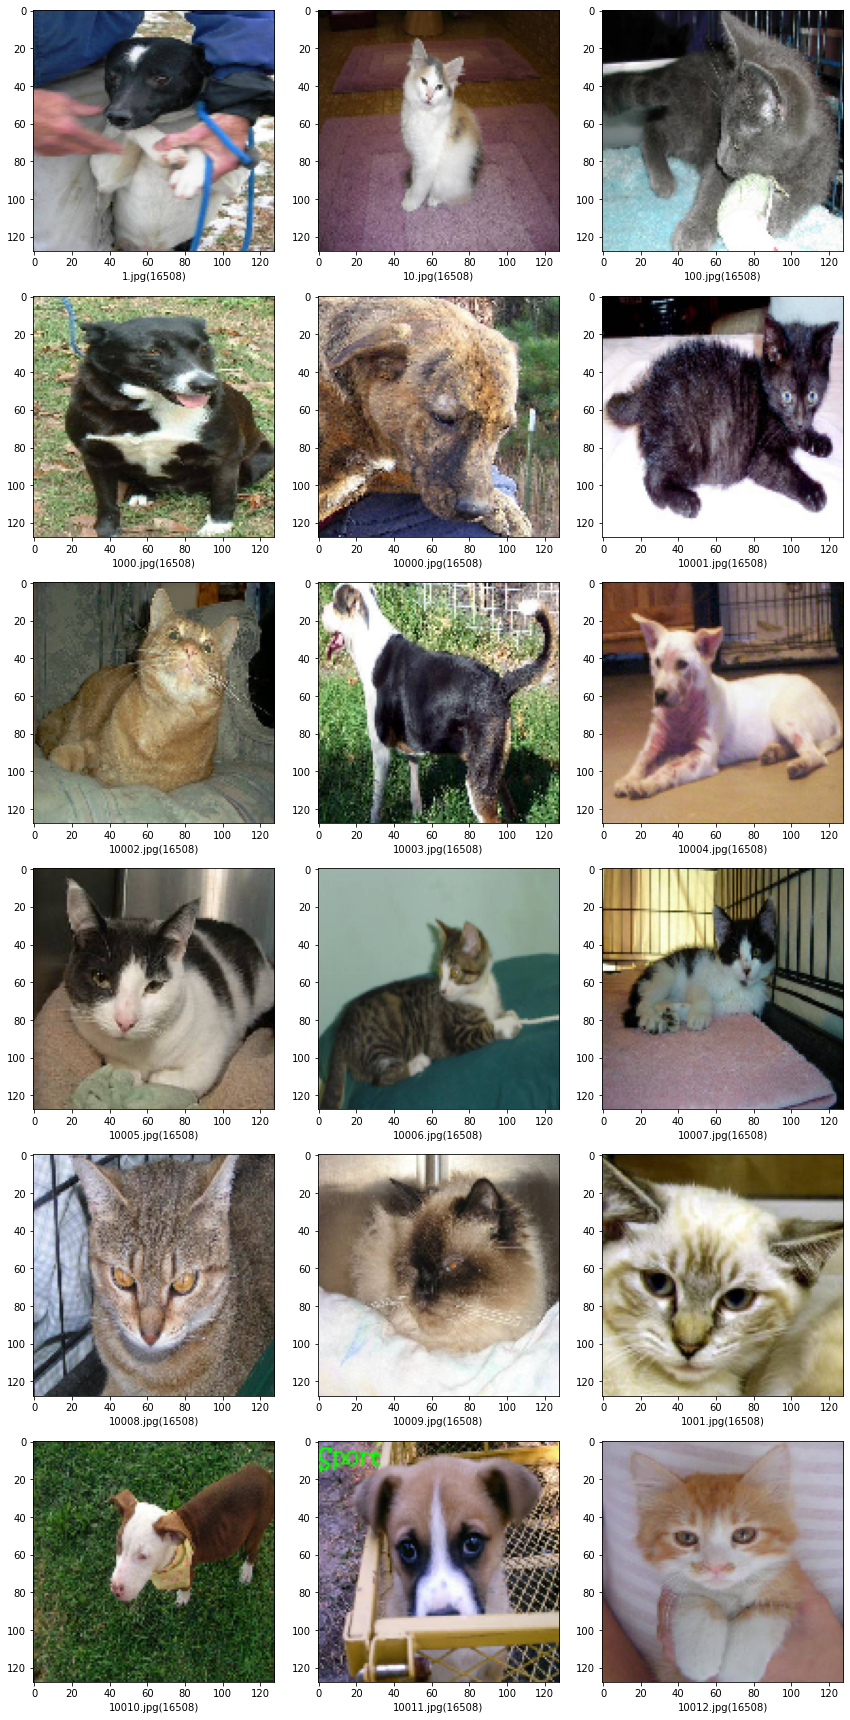

In [36]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/rachit/Documents/Projects/test1/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [40]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("C:/Users/rachit/Documents/Projects/test1/test1/113.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

1 dog


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
model = load_model('model1_catsVSdogs.h5')
#dictionary to label all traffic signs class.
classes = { 
    0:'its a cat',
    1:'its a dog',
 
}
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('CatsVSDogs Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((128,128))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image/255
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),
   padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="CatsVSDogs Classification",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

its a dog
its a cat
its a cat
its a cat
